In [153]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [154]:
train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_train_features.npy')
train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_train_labels.npy')
train_features = np.squeeze(train_features)
print("train_features.shape:",train_features.shape)
print("train_labels.shape", train_labels.shape)

test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_test_features.npy')
test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_test_labels.npy')
test_features = np.squeeze(test_features)
print("test_features.shape:",test_features.shape)
print("test_labels.shape", test_labels.shape)

train_features.shape: (25456, 84)
train_labels.shape (25456, 1)
test_features.shape: (5920, 84)
test_labels.shape (5920, 1)


In [155]:
addfeatures_train = []
addfeatures_test = []

for i in range(86):
    min_train = train_features[i*296:(i+1)*296]
    addfeatures_train.append(min_train)
    
for i in range(20):
    min_test = test_features[i*296:(i+1)*296]
    addfeatures_test.append(min_test)
    
addfeatures_train = np.squeeze(np.array(addfeatures_train))
#addfeatures_train = addfeatures_train.transpose(0,2,1)
addfeatures_test = np.squeeze(np.array(addfeatures_test))
#addfeatures_test = addfeatures_test.transpose(0,2,1)
    
addtrain_labels = np.array([0]*43+[1]*43)
addtest_labels = np.array([0]*10+[1]*10)

In [156]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.connectome import sym_matrix_to_vec

conn_est = ConnectivityMeasure(kind = 'tangent')
addfeatures_train = conn_est.fit_transform(addfeatures_train)
addfeatures_train = sym_matrix_to_vec(addfeatures_train)

addfeatures_test = conn_est.fit_transform(addfeatures_test)
addfeatures_test = sym_matrix_to_vec(addfeatures_test)

D:\anaconda\lib\site-packages\nilearn\connectome\connectivity_matrices.py:192: UserWarning: Maximum number of iterations 30 reached without getting to the requested tolerance level 1e-07.
  "{1}.".format(max_iter, tol))
D:\anaconda\lib\site-packages\nilearn\connectome\connectivity_matrices.py:192: UserWarning: Maximum number of iterations 30 reached without getting to the requested tolerance level 1e-07.
  "{1}.".format(max_iter, tol))


In [157]:
# data = np.append(addfeatures_train,addfeatures_test,axis=0)
# label = np.append(addtrain_labels,addtest_labels,axis=0)

In [158]:
def fisherscore(data, labels, num):

    high = len(data)  # 向量个数
    weight = len(data[0])  # 向量长度
    P_num = np.sum(labels == 0)  # 正样本
    N_num = np.sum(labels == 1)  # 负样本

    # 计算Fisher score

    fisherscore = []
    for i in range(weight):
        p = []
        n = []
        p_var = []
        n_var = []
        for j in range(high):
            if labels[j] == 0:
                p.append(data[j, i])
            if labels[j] == 1:
                n.append(data[j, i])

        p_average = np.sum(p) / len(p)
        n_average = np.sum(n) / len(n)
        average = (np.sum(p) + np.sum(n)) / (len(p) + len(n))

        for j in range(high):
            if labels[j] == 0:
                p_var.append((data[j, i] - p_average) ** 2)
            if labels[j] == 1:
                n_var.append((data[j, i] - n_average) ** 2)

        score = ((p_average - average) ** 2 + (n_average - average) ** 2) / (
                    np.sum(p_var) / len(p) + np.sum(n_var) / len(n))

        fisherscore.append(score)

    index = np.argsort(-np.array(fisherscore))  # 返回索引
    new_data = []
    for i in range(num):
        new_data.append(data[:, index[i]])

    new_data = np.array(new_data)
    new_data = new_data.transpose(1, 0)

    return new_data

In [159]:
fisher_train = fisherscore(addfeatures_train, addtrain_labels, 2)
fisher_test = fisherscore(addfeatures_test, addtest_labels, 2)

In [160]:
# traindata = fisher_data[0:86]
# testdata = fisher_data[86:106]
# addtrain_labels = np.array([0]*43+[1]*43)
# addtest_labels = np.array([0]*10+[1]*10)

In [161]:
from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(fisher_train, addtrain_labels)
classifier.score(fisher_test, addtest_labels)

0.85

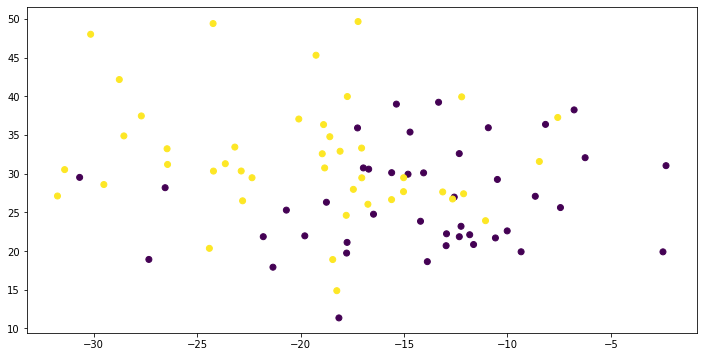

In [162]:
plt.figure(figsize=(12, 6))
plt.scatter(traindata[:, 0], traindata[:, 1], c=addtrain_labels)

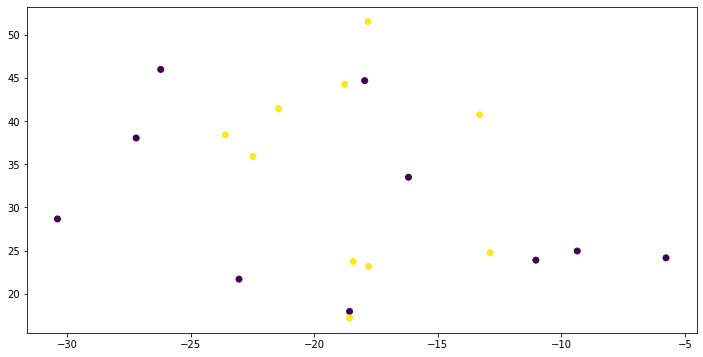

In [163]:
plt.figure(figsize=(12, 6))
plt.scatter(testdata[:, 0], testdata[:, 1], c=addtest_labels)